In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [4]:
df=pd.read_csv('Turbine_Data_Kelmarsh_1.csv', skiprows=9)

In [5]:
df.head()

# Date and time  Wind speed (m/s)  \
0  2020-01-01 00:00:00          3.887291   
1  2020-01-01 00:10:00          3.848941   
2  2020-01-01 00:20:00          4.043625   
3  2020-01-01 00:30:00          3.330342   
4  2020-01-01 00:40:00          3.388536   

   Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                              0.646663                   2.629255   
1                              0.787454                   2.456995   
2                              0.983279                   2.726894   
3                              0.689929                   1.541864   
4                              0.897104                   1.832924   

   Wind speed, Maximum (m/s)  Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
0                   5.138163                   7.1                   4.390778   
1                   5.551735                   7.1                   4.216298   
2                   6.251913                   7.1                   4.323125   
3                   4.689322                   7.1                   3.584192   
4                   5.210185                   7.1                   3.668500   

   Wind speed Sensor 1, Standard deviation (m/s)  \
0                                       0.595037   
1                                       0.686900   
2                                       1.053373   
3                                       0.524914   
4                                       0.885085   

   Wind speed Sensor 1, Minimum (m/s)  Wind speed Sensor 1, Maximum (m/s)  \
0                            2.894442                            5.923776   
1                            3.387660                            5.713417   
2                            3.305274                            6.688592   
3                            2.547872                            4.671783   
4                            1.908008                            5.278419   

   ...  Tower Acceleration y (mm/ss)  Tower Acceleration X, Min (mm/ss)  \
0  ...                     30.390030                                NaN   
1  ...                     32.042564                                NaN   
2  ...                     32.799056                                NaN   
3  ...                     36.129912                                NaN   
4  ...                     26.667582                                NaN   

   Tower Acceleration X, Max (mm/ss)  Tower Acceleration Y, Min (mm/ss)  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   Tower Acceleration Y, Max (mm/ss)  Drive train acceleration, Max (mm/ss)  \
0                                NaN                                    NaN   
1                                NaN                                    NaN   
2                                NaN                                    NaN   
3                                NaN                                    NaN   
4                                NaN                                    NaN   

   Drive train acceleration, Min (mm/ss)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Drive train acceleration, StdDev (mm/ss)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Tower Acceleration X, StdDev (mm/ss)  Tower Acceleration Y, StdDev (mm/ss)  
0                                   NaN              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Columns: 299 entries, # Date and time to Tower Acceleration Y, StdDev (mm/ss)
dtypes: float64(294), int64(4), object(1)
memory usage: 120.2+ MB


In [7]:
df

# Date and time  Wind speed (m/s)  \
0      2020-01-01 00:00:00          3.887291   
1      2020-01-01 00:10:00          3.848941   
2      2020-01-01 00:20:00          4.043625   
3      2020-01-01 00:30:00          3.330342   
4      2020-01-01 00:40:00          3.388536   
...                    ...               ...   
52699  2020-12-31 23:10:00          5.119444   
52700  2020-12-31 23:20:00          5.009681   
52701  2020-12-31 23:30:00          5.060813   
52702  2020-12-31 23:40:00          4.814269   
52703  2020-12-31 23:50:00          5.477400   

       Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                                  0.646663                   2.629255   
1                                  0.787454                   2.456995   
2                                  0.983279                   2.726894   
3                                  0.689929                   1.541864   
4                                  0.897104                   1.832924   
...                                     ...                        ...   
52699                              0.138374                   4.902000   
52700                              0.145155                   4.666500   
52701                              0.089126                   4.891875   
52702                              0.278785                   4.128750   
52703                              0.491953                   4.857000   

       Wind speed, Maximum (m/s)  Long Term Wind (m/s)  \
0                       5.138163                   7.1   
1                       5.551735                   7.1   
2                       6.251913                   7.1   
3                       4.689322                   7.1   
4                       5.210185                   7.1   
...                          ...                   ...   
52699                   5.344500                   7.0   
52700                   5.300250                   7.0   
52701                   5.250000                   7.0   
52702                   5.164500                   7.0   
52703                   6.252750                   7.0   

       Wind speed Sensor 1 (m/s)  \
0                       4.390778   
1                       4.216298   
2                       4.323125   
3                       3.584192   
4                       3.668500   
...                          ...   
52699                   4.815071   
52700                   4.759028   
52701                   4.825727   
52702                   4.740983   
52703                   5.312566   

       Wind speed Sensor 1, Standard deviation (m/s)  \
0                                           0.595037   
1                                           0.686900   
2                                           1.053373   
3                                           0.524914   
4                                           0.885085   
...                                              ...   
52699                                       0.172836   
52700                                       0.192205   
52701                                       0.199880   
52702                                       0.149325   
52703                                       0.519031   

       Wind speed Sensor 1, Minimum (m/s)  Wind speed Sensor 1, Maximum (m/s)  \
0                                2.894442                            5.923776   
1                                3.387660                            5.713417   
2                                3.305274                            6.688592   
3                                2.547872                            4.671783   
4                                1.908008                            5.278419   
...                                   ...                                 ...   
52699                            4.544675                            5.144063   
52700                            4.351247                            5.136302   
52701        

In [8]:
df = df.fillna(0)

In [9]:
df.head()

# Date and time  Wind speed (m/s)  \
0  2020-01-01 00:00:00          3.887291   
1  2020-01-01 00:10:00          3.848941   
2  2020-01-01 00:20:00          4.043625   
3  2020-01-01 00:30:00          3.330342   
4  2020-01-01 00:40:00          3.388536   

   Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                              0.646663                   2.629255   
1                              0.787454                   2.456995   
2                              0.983279                   2.726894   
3                              0.689929                   1.541864   
4                              0.897104                   1.832924   

   Wind speed, Maximum (m/s)  Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
0                   5.138163                   7.1                   4.390778   
1                   5.551735                   7.1                   4.216298   
2                   6.251913                   7.1                   4.323125   
3                   4.689322                   7.1                   3.584192   
4                   5.210185                   7.1                   3.668500   

   Wind speed Sensor 1, Standard deviation (m/s)  \
0                                       0.595037   
1                                       0.686900   
2                                       1.053373   
3                                       0.524914   
4                                       0.885085   

   Wind speed Sensor 1, Minimum (m/s)  Wind speed Sensor 1, Maximum (m/s)  \
0                            2.894442                            5.923776   
1                            3.387660                            5.713417   
2                            3.305274                            6.688592   
3                            2.547872                            4.671783   
4                            1.908008                            5.278419   

   ...  Tower Acceleration y (mm/ss)  Tower Acceleration X, Min (mm/ss)  \
0  ...                     30.390030                                0.0   
1  ...                     32.042564                                0.0   
2  ...                     32.799056                                0.0   
3  ...                     36.129912                                0.0   
4  ...                     26.667582                                0.0   

   Tower Acceleration X, Max (mm/ss)  Tower Acceleration Y, Min (mm/ss)  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   Tower Acceleration Y, Max (mm/ss)  Drive train acceleration, Max (mm/ss)  \
0                                0.0                                    0.0   
1                                0.0                                    0.0   
2                                0.0                                    0.0   
3                                0.0                                    0.0   
4                                0.0                                    0.0   

   Drive train acceleration, Min (mm/ss)  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Drive train acceleration, StdDev (mm/ss)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Tower Acceleration X, StdDev (mm/ss)  Tower Acceleration Y, StdDev (mm/ss)  
0                                   0.0              

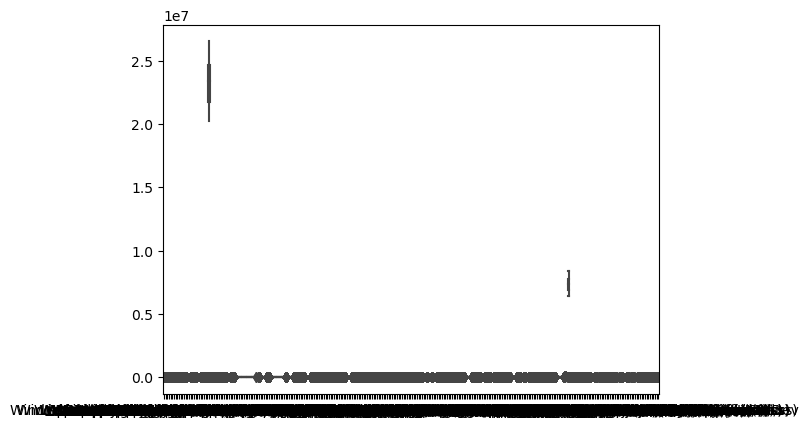

In [10]:
sns.boxplot(data=df)
plt.show()

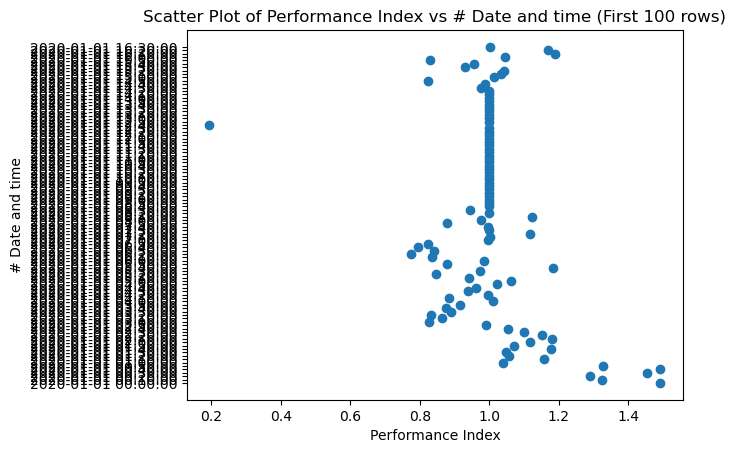

In [11]:
column_x = 'Performance Index'
column_y = '# Date and time'

#first 100 rows
plt.scatter(df.loc[:99, column_x], df.loc[:99, column_y])
plt.title(f'Scatter Plot of {column_x} vs {column_y} (First 100 rows)')
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()

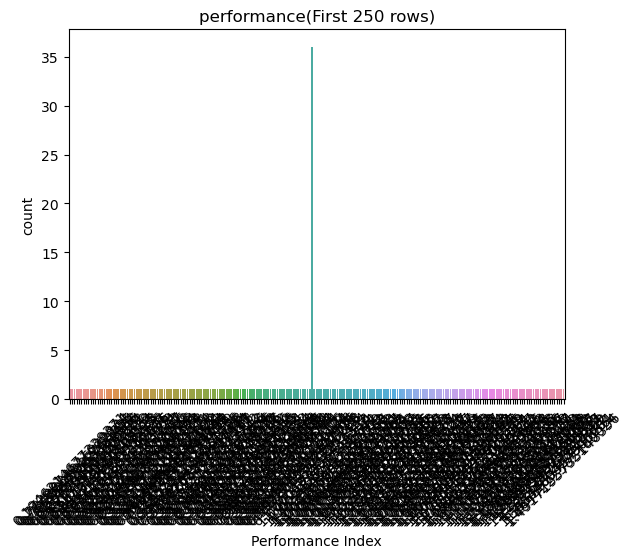

In [12]:
column_time = 'Performance Index'
#first 250 rows
sns.countplot(x=column_time, data=df.head(250))
plt.title('performance(First 250 rows)')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


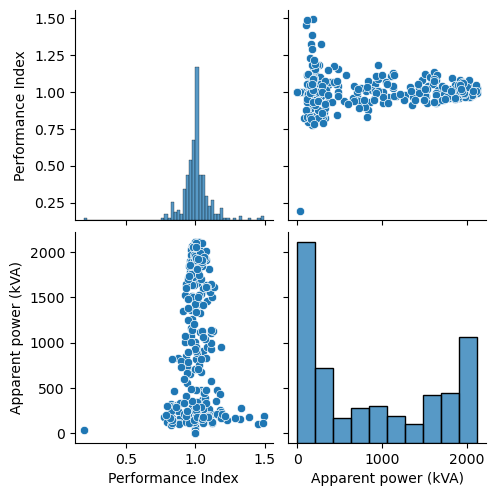

In [13]:
subset_columns = ['# Date and time', 'Performance Index', 'Apparent power (kVA)']
sns.pairplot(df.head(300)[subset_columns])
plt.show()

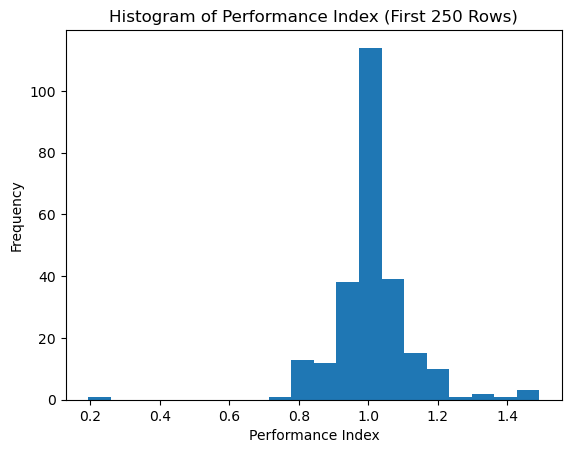

In [14]:
selected_column ='Performance Index' 
#histogram first 250
plt.hist(df[selected_column].head(250), bins=20)
plt.title(f'Histogram of {selected_column} (First 250 Rows)')
plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.show()

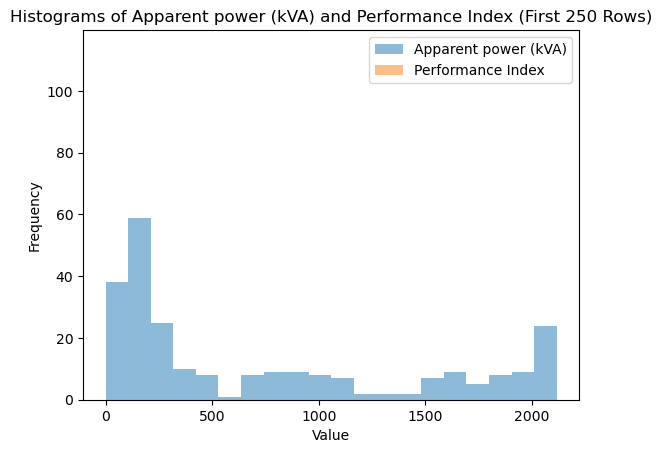

In [15]:
selected_column1 = 'Apparent power (kVA)'
selected_column2 = 'Performance Index'  

#first 250 rows
plt.hist(df[selected_column1].head(250), bins=20, alpha=0.5, label=selected_column1)
plt.hist(df[selected_column2].head(250), bins=20, alpha=0.5, label=selected_column2)

plt.title(f'Histograms of {selected_column1} and {selected_column2} (First 250 Rows)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


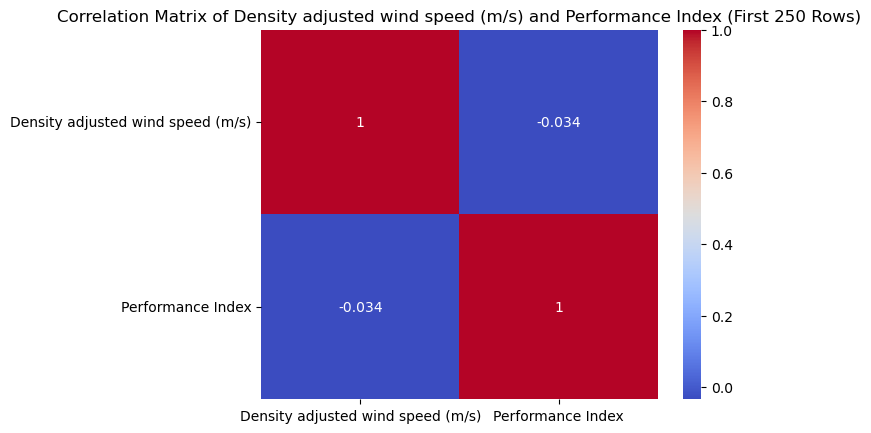

In [16]:
#cor mat
selected_column1 = 'Density adjusted wind speed (m/s)'  
selected_column2 = 'Performance Index'  

subset_df = df[[selected_column1, selected_column2]].head(250)

#correlation matrix
corr_mat_subset = subset_df.corr()

sns.heatmap(corr_mat_subset, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix of {selected_column1} and {selected_column2} (First 250 Rows)')
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

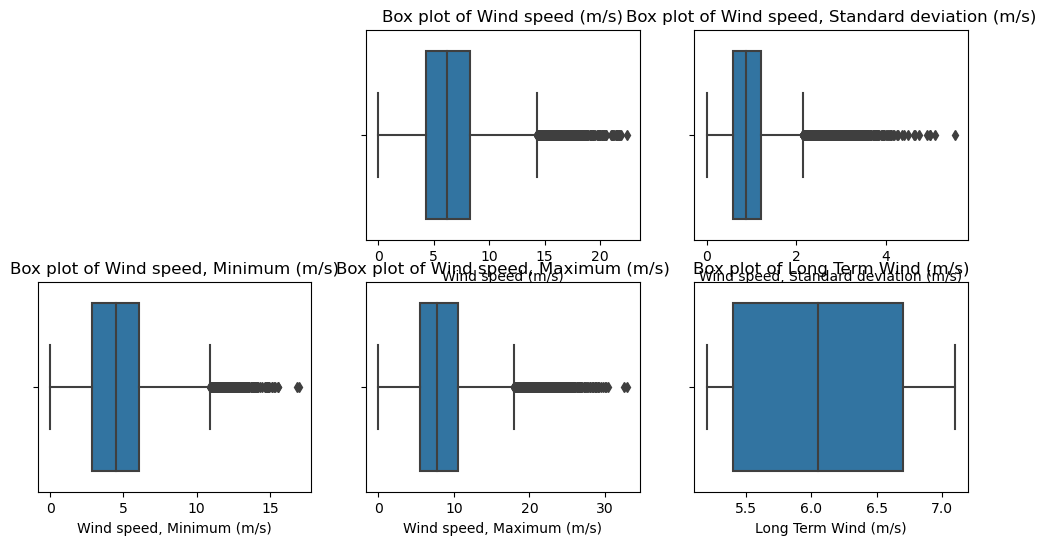

In [17]:
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.subplot(2, 3, list(df.columns).index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 244. PiB for an array with shape (34314054067901856,) and data type float64

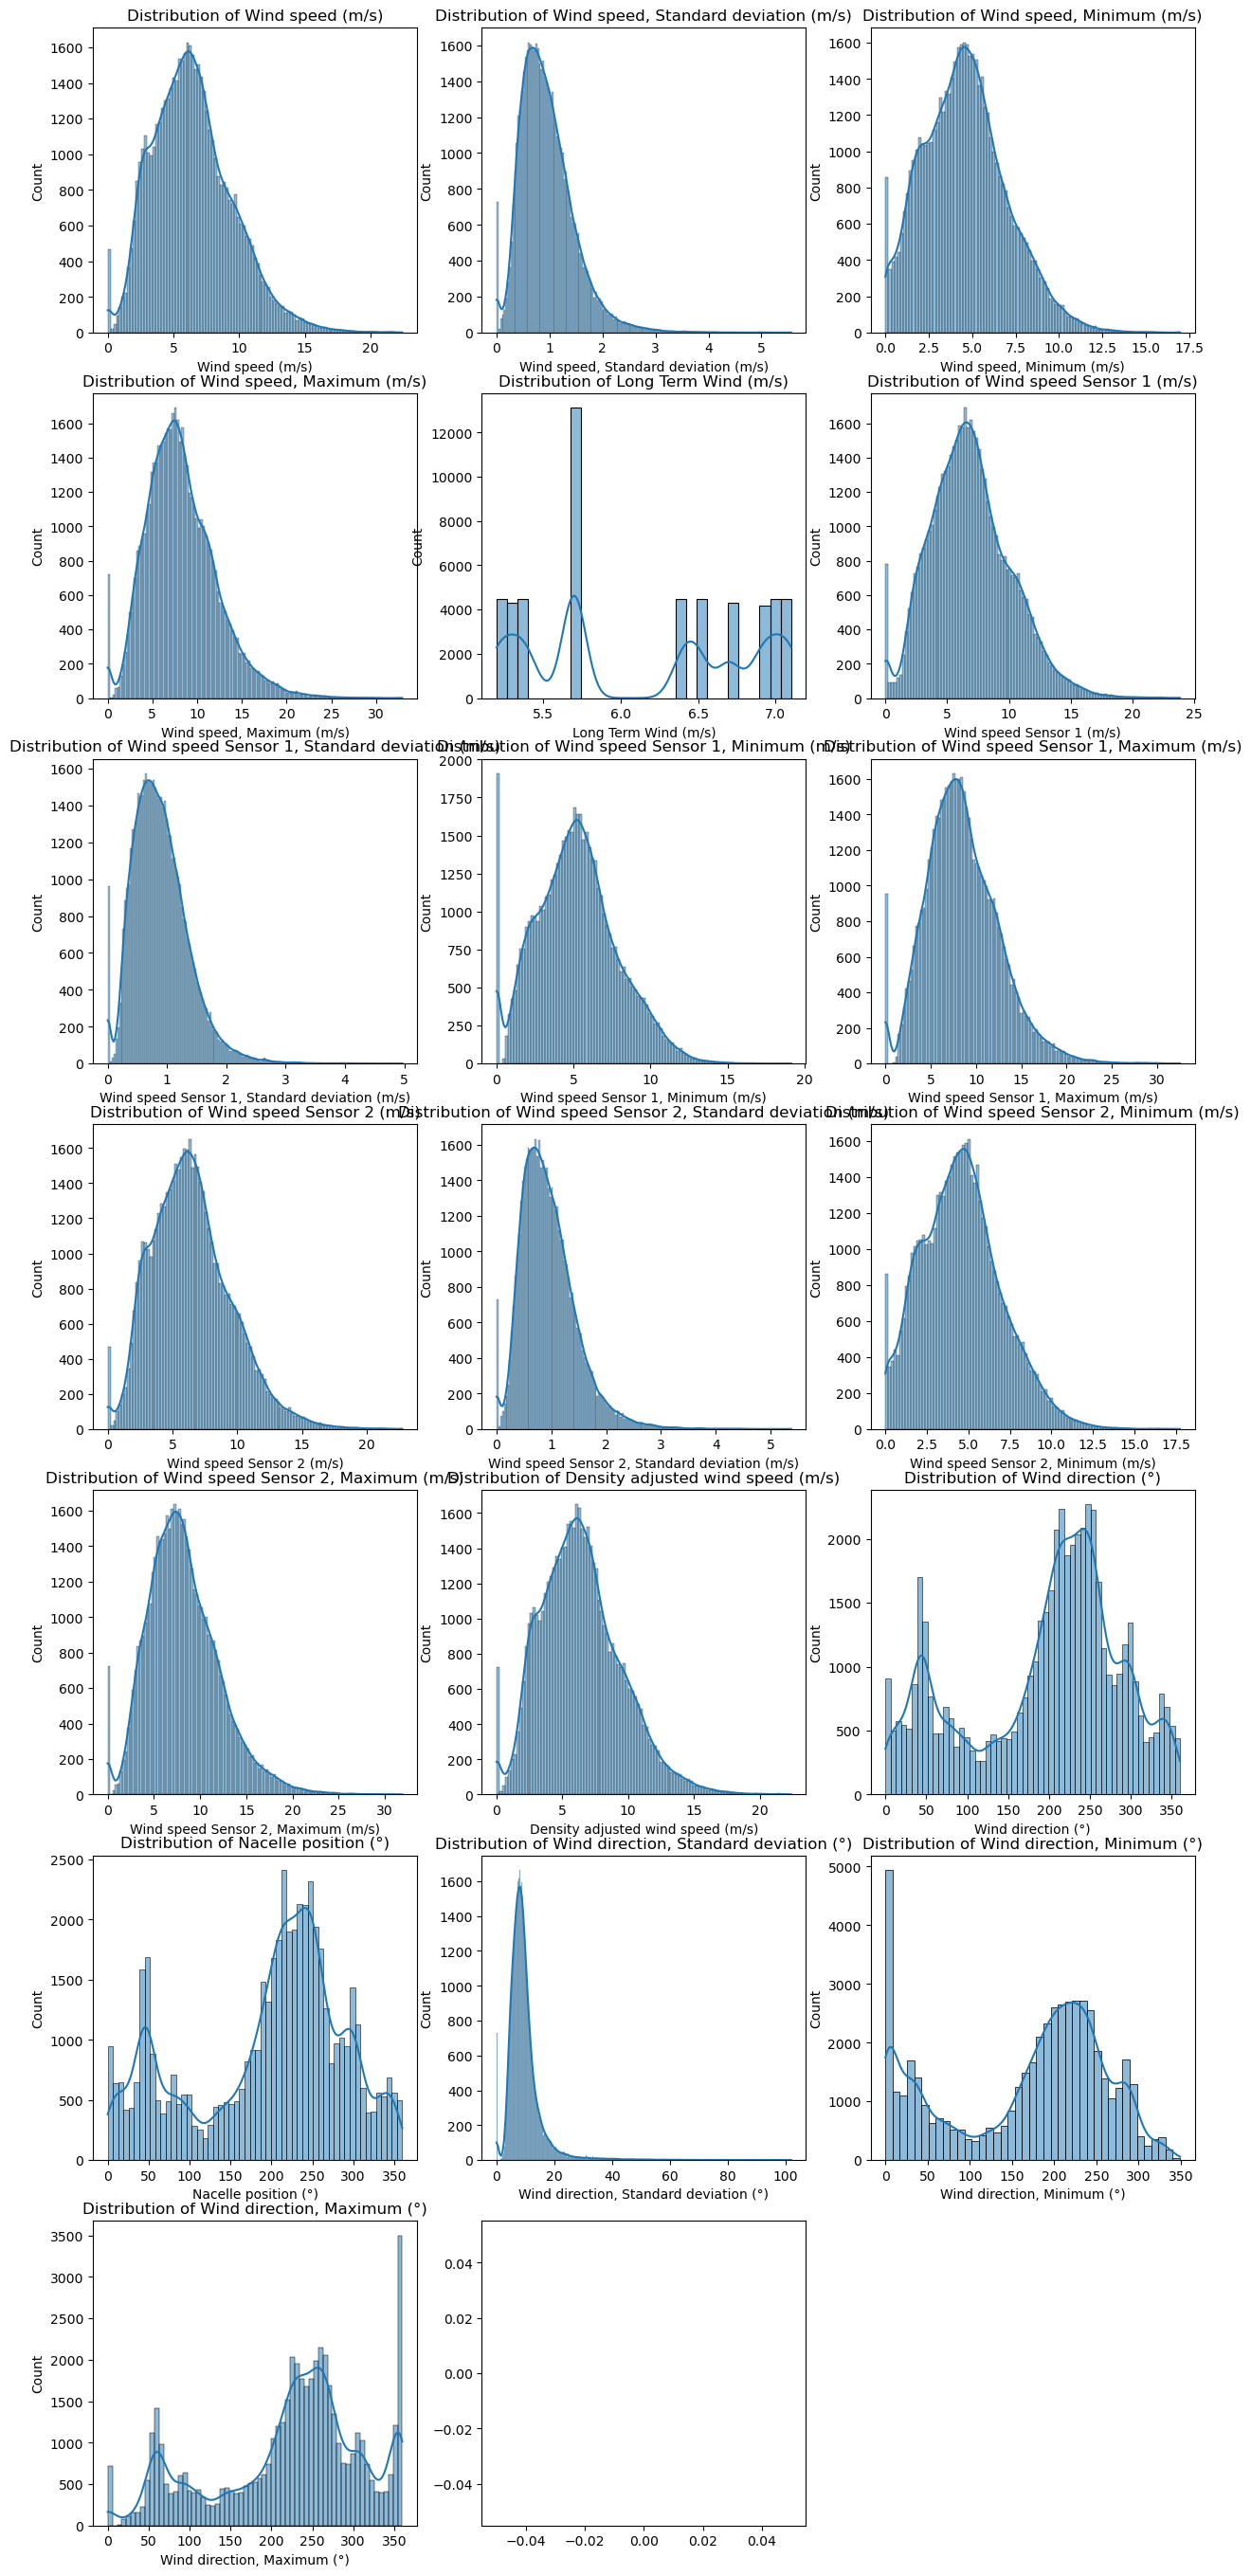

In [19]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_count = len(num_cols)
num_cols_per_row = 3  # You can adjust this based on the number of numerical columns

plt.figure(figsize=(15, 5 * (num_cols_count // num_cols_per_row + 1)))
for i, column in enumerate(num_cols, 1):
    plt.subplot((num_cols_count // num_cols_per_row) + 1, num_cols_per_row, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [20]:
plt.figure(figsize=(15, 5 * (num_cols_count // num_cols_per_row + 1)))
for i, column in enumerate(num_cols, 1):
    plt.subplot((num_cols_count // num_cols_per_row) + 1, num_cols_per_row, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()